In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ASUS\Labs\Cyber\SpamAssasin.csv")

In [2]:
df

,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1
...,...,...,...,...,...,...,...
5804,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1
5805,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1
5806,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1
5807,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    5809 non-null   object
 1   receiver  5599 non-null   object
 2   date      5809 non-null   object
 3   subject   5793 non-null   object
 4   body      5808 non-null   object
 5   label     5809 non-null   int64 
 6   urls      5809 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 317.8+ KB


In [4]:
df.isnull().sum()

sender        0
receiver    210
date          0
subject      16
body          1
label         0
urls          0
dtype: int64

In [5]:
df.label[df.label==0].count()

4091

In [6]:
df.label[df.label==1].count()

1718

In [7]:
import pandas as pd

df_cleaned = df.dropna(subset=['body', 'subject']).reset_index(drop=True)

print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())




Missing values after cleaning:
sender        0
receiver    210
date          0
subject       0
body          0
label         0
urls          0
dtype: int64


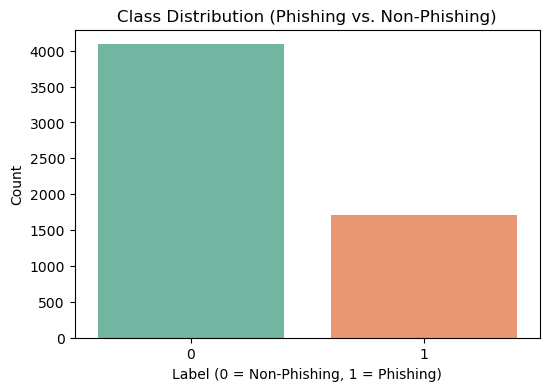

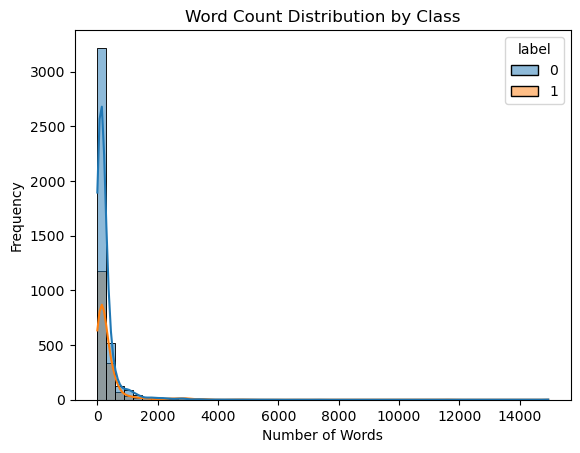

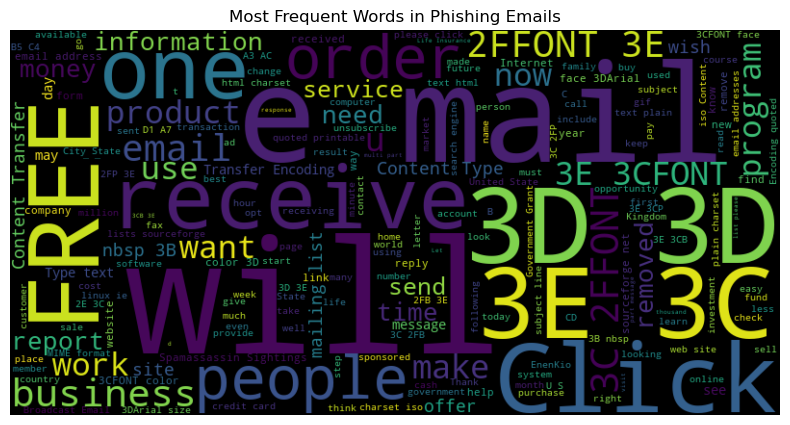

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df_cleaned, palette='Set2')
plt.title("Class Distribution (Phishing vs. Non-Phishing)")
plt.xlabel("Label (0 = Non-Phishing, 1 = Phishing)")
plt.ylabel("Count")
plt.show()

df_cleaned['word_count'] = df_cleaned['body'].apply(lambda x: len(str(x).split()))
sns.histplot(df_cleaned, x='word_count', hue='label', bins=50, kde=True)
plt.title("Word Count Distribution by Class")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

phishing_words = ' '.join(df_cleaned[df_cleaned['label'] == 1]['body'])
word_cloud = WordCloud(width=800, height=400, background_color='black').generate(phishing_words)
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Phishing Emails")
plt.show()




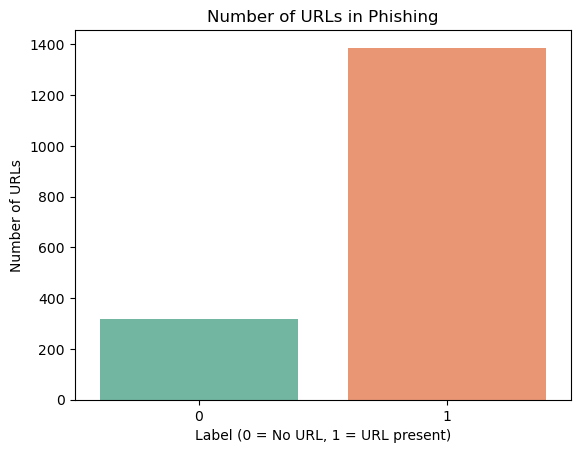

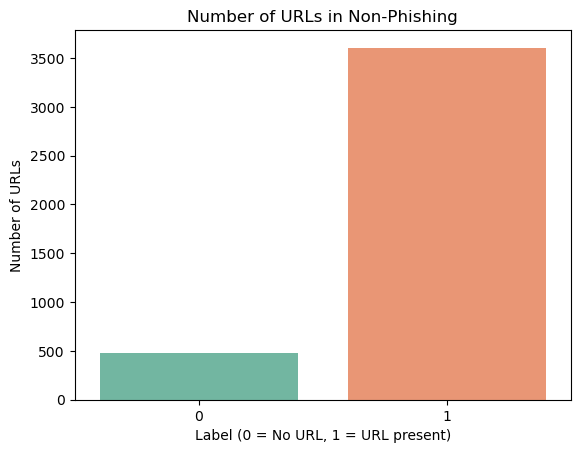

In [9]:
sns.countplot(x='urls', data=df_cleaned[df_cleaned['label']==1], palette='Set2')
plt.title("Number of URLs in Phishing")
plt.xlabel("Label (0 = No URL, 1 = URL present)")
plt.ylabel("Number of URLs")
plt.show()

sns.countplot(x='urls', data=df_cleaned[df_cleaned['label']==0], palette='Set2')
plt.title("Number of URLs in Non-Phishing")
plt.xlabel("Label (0 = No URL, 1 = URL present)")
plt.ylabel("Number of URLs")
plt.show()

In [10]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd


sbert_model = SentenceTransformer('all-MiniLM-L6-v2') 
df['sender'] = df['sender'].fillna("").astype(str)
df['subject'] = df['subject'].fillna("").astype(str)
df['body'] = df['body'].fillna("").astype(str)

df['combined_text'] = df['sender'] + " " + df['subject'] + " " + df['body']

df['combined_text'] = df['combined_text'].fillna("")

df['single_embedding'] = df['combined_text'].apply(lambda x: sbert_model.encode(x).tolist())


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X = np.vstack(df['single_embedding'].values) 
y = df['label'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9630
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       835
           1       0.94      0.93      0.93       327

    accuracy                           0.96      1162
   macro avg       0.95      0.95      0.95      1162
weighted avg       0.96      0.96      0.96      1162



In [12]:
import re
def extract_urls(text):
    url_pattern = r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'
    return re.findall(url_pattern, str(text))

df_cleaned['extracted_urls'] = df_cleaned['body'].apply(extract_urls)

df_cleaned['extracted_urls'] = df_cleaned['extracted_urls'].apply(lambda x: ', '.join(x) if x else '')

In [13]:
df_cleaned

,sender,receiver,date,subject,body,label,urls,word_count,extracted_urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1,224,https://listman.redhat.com
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1,111,"http://us.click.yahoo.com, http://docs.yahoo.com"
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1,252,"http://us.click.yahoo.com, http://docs.yahoo.com"
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1,164,"http://www.pcworld.com, http://tb.tf"
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1,143,"http://www.ee.ed.ac.uk, http://us.click.yahoo...."
...,...,...,...,...,...,...,...,...,...
5787,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1,370,"http://images.pcdi-homestudy.com, http://image..."
5788,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1,396,"http://www.insuranceiq.com, http://www.insuran..."
5789,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1,340,"http://www.worldbizservices.net, http://www.wo..."
5790,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0,3528,


In [14]:
avg=df_cleaned.word_count[df_cleaned.label==0].sum()/len(df_cleaned.word_count[df_cleaned.label==0])
print("Avg word count for Non Phising email: ",avg)

Avg word count for Non Phising email:  280.2410080743822


In [15]:
avg=df_cleaned.word_count[df_cleaned.label==1].sum()/len(df_cleaned.word_count[df_cleaned.label==1])
print("Avg word count for Phising email: ",avg)

Avg word count for Phising email:  359.47390029325516


In [16]:
df=df_cleaned

In [17]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd

sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

df['sender_embedding'] = df['sender'].apply(lambda x: sbert_model.encode(x).tolist())
df['subject_embedding'] = df['subject'].apply(lambda x: sbert_model.encode(x).tolist())
df['body_embedding'] = df['body'].apply(lambda x: sbert_model.encode(x).tolist())
df['url_embedding'] = df['extracted_urls'].apply(lambda x: sbert_model.encode(x).tolist() if x else np.zeros(384).tolist())
def merge_embeddings(row):
    return np.concatenate([
        row['sender_embedding'],
        row['subject_embedding'],
        row['body_embedding'],
        row['url_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [39]:
df.to_csv('With_Embeddings.csv',index=False)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X = np.vstack(df['combined_embedding'].values) 
y = df['label'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9896
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       821
           1       0.99      0.98      0.98       338

    accuracy                           0.99      1159
   macro avg       0.99      0.99      0.99      1159
weighted avg       0.99      0.99      0.99      1159



In [1]:
import pandas as pd
df=pd.read_csv(r'With_Embeddings.csv')

In [6]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

df['tokenized_urls'] = df['extracted_urls'].fillna("").apply(lambda x: word_tokenize(x.lower()))

url_model = Word2Vec(sentences=df['tokenized_urls'], vector_size=128, window=5, min_count=1, sg=0)  # CBOW (sg=0)

def get_url_embedding(tokens):
    if not tokens or len(tokens) == 0:
        return np.zeros(128)  
    vectors = [url_model.wv[word] for word in tokens if word in url_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(128)

df['url_embedding_word2vec'] = df['tokenized_urls'].apply(get_url_embedding)


In [12]:
import ast
import numpy as np

df['sender_embedding'] = df['sender_embedding'].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))
df['subject_embedding'] = df['subject_embedding'].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))
df['body_embedding'] = df['body_embedding'].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))

def merge_embeddings(row):
    return np.concatenate([
        row['sender_embedding'],  
        row['subject_embedding'],  
        row['body_embedding'],  
        row['url_embedding_word2vec']
    ])

df['combined_embedding_word2vec'] = df.apply(merge_embeddings, axis=1)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X = np.vstack(df['combined_embedding_word2vec'].values) 
y = df['label'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9836
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       821
           1       0.98      0.96      0.97       338

    accuracy                           0.98      1159
   macro avg       0.98      0.98      0.98      1159
weighted avg       0.98      0.98      0.98      1159



In [81]:
import pandas as pd

# File paths
file_paths = {
    "spamassassin": r"C:\Users\ASUS\Downloads\archive (1)\SpamAssasin.csv",
    "enron": r"C:\Users\ASUS\Downloads\archive (1)\Enron.csv",
    "ling": r"C:\Users\ASUS\Downloads\archive (1)\Ling.csv",
    "nazario": r"C:\Users\ASUS\Downloads\archive (1)\Nazario.csv",
    "nigerian_fraud":  r"C:\Users\ASUS\Downloads\archive (1)\Nigerian_Fraud.csv",
    "ceas_08": r"C:\Users\ASUS\Downloads\archive (1)\CEAS_08.csv"
}


def load_and_standardize(file_path):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.lower().str.strip()
    if 'text_combined' in df.columns:
        df['body'] = df['text_combined']
    column_mapping = {
        'from': 'sender',
        'to': 'receiver',
        'urls_extracted': 'urls'
    }
    
    df.rename(columns=column_mapping, inplace=True)
    for col in ['sender', 'subject', 'body', 'label']:
        if col not in df.columns:
            df[col] = ""
    df = df[['sender', 'subject', 'body', 'label']]
    return df

dfs = [load_and_standardize(path) for path in file_paths.values()]

final_df = pd.concat(dfs, ignore_index=True)

final_df.fillna("", inplace=True)

final_df.to_csv("merged_dataset.csv", index=False)

print("Merged dataset saved as 'merged_dataset.csv' with no NaN values.")

Merged dataset saved as 'merged_dataset.csv' with no NaN values.


In [82]:
final_df

,sender,subject,body,label
0,Robert Elz <kre@munnari.OZ.AU>,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0
1,Steve Burt <Steve_Burt@cursor-system.com>,[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0
2,"""Tim Chapman"" <timc@2ubh.com>",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0
3,Monty Solomon <monty@roscom.com>,[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0
...,...,...,...,...
82481,CNN Alerts <charlene-detecton@btcmarketing.com>,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1
82482,CNN Alerts <idgetily1971@careplusnj.org>,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1
82483,Abhijit Vyas <xpojhbz@gmail.com>,Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0
82484,Joseph Brennan <vupzesm@columbia.edu>,Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0


In [83]:
import re
def extract_urls(text):
    url_pattern = r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'
    return re.findall(url_pattern, str(text))

final_df['extracted_urls'] = final_df['body'].apply(extract_urls)

final_df['extracted_urls'] = final_df['extracted_urls'].apply(lambda x: ', '.join(x) if x else '')

In [84]:
final_df

,sender,subject,body,label,extracted_urls
0,Robert Elz <kre@munnari.OZ.AU>,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,https://listman.redhat.com
1,Steve Burt <Steve_Burt@cursor-system.com>,[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,"http://us.click.yahoo.com, http://docs.yahoo.com"
2,"""Tim Chapman"" <timc@2ubh.com>",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,"http://us.click.yahoo.com, http://docs.yahoo.com"
3,Monty Solomon <monty@roscom.com>,[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,"http://www.pcworld.com, http://tb.tf"
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,"http://www.ee.ed.ac.uk, http://us.click.yahoo...."
...,...,...,...,...,...
82481,CNN Alerts <charlene-detecton@btcmarketing.com>,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,
82482,CNN Alerts <idgetily1971@careplusnj.org>,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,
82483,Abhijit Vyas <xpojhbz@gmail.com>,Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,
82484,Joseph Brennan <vupzesm@columbia.edu>,Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,


In [41]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd

sbert_model = SentenceTransformer('all-MiniLM-L6-v2') 

final_df['sender_embedding'] = final_df['sender'].apply(lambda x: sbert_model.encode(x).tolist())
final_df['subject_embedding'] = final_df['subject'].apply(lambda x: sbert_model.encode(x).tolist())
final_df['body_embedding'] = final_df['body'].apply(lambda x: sbert_model.encode(x).tolist())
final_df['url_embedding'] = final_df['extracted_urls'].apply(lambda x: sbert_model.encode(x).tolist() if x else np.zeros(384).tolist())
def merge_embeddings(row):
    return np.concatenate([
        row['sender_embedding'],
        row['subject_embedding'],
        row['body_embedding'],
        row['url_embedding']
    ])

final_df['combined_embedding'] = final_df.apply(merge_embeddings, axis=1)


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [42]:
from sklearn.metrics import accuracy_score

X_test = np.vstack(final_df['combined_embedding'].values)  
y_test = final_df['label'].values  

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.6404


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9526
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       155
           1       1.00      0.86      0.92        77

    accuracy                           0.95       232
   macro avg       0.97      0.93      0.94       232
weighted avg       0.96      0.95      0.95       232



In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9095
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       155
           1       1.00      0.73      0.84        77

    accuracy                           0.91       232
   macro avg       0.94      0.86      0.89       232
weighted avg       0.92      0.91      0.91       232



In [46]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:59:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9483
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       155
           1       0.99      0.86      0.92        77

    accuracy                           0.95       232
   macro avg       0.96      0.93      0.94       232
weighted avg       0.95      0.95      0.95       232



In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9698
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       155
           1       0.99      0.92      0.95        77

    accuracy                           0.97       232
   macro avg       0.97      0.96      0.97       232
weighted avg       0.97      0.97      0.97       232



In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9612
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       155
           1       1.00      0.88      0.94        77

    accuracy                           0.96       232
   macro avg       0.97      0.94      0.95       232
weighted avg       0.96      0.96      0.96       232



In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_clf = SVC(kernel='poly', random_state=42)
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9397
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       155
           1       1.00      0.82      0.90        77

    accuracy                           0.94       232
   macro avg       0.96      0.91      0.93       232
weighted avg       0.94      0.94      0.94       232



In [24]:
import pandas as pd

file_paths = {
    "spamassassin": r"C:\Users\ASUS\Downloads\archive (1)\SpamAssasin.csv",
    "enron": r"C:\Users\ASUS\Downloads\archive (1)\Enron.csv",
    "ling": r"C:\Users\ASUS\Downloads\archive (1)\Ling.csv",
    "nazario": r"C:\Users\ASUS\Downloads\archive (1)\Nazario.csv",
    "nigerian_fraud":  r"C:\Users\ASUS\Downloads\archive (1)\Nigerian_Fraud.csv",
    "ceas_08": r"C:\Users\ASUS\Downloads\archive (1)\CEAS_08.csv"
}


def load_and_standardize(file_path):
    df = pd.read_csv(file_path)
    
    df.columns = df.columns.str.lower().str.strip()
    
    if 'text_combined' in df.columns:
        df['body'] = df['text_combined']

    column_mapping = {
        'from': 'sender',
        'to': 'receiver',
        'urls_extracted': 'urls'
    }
    
    df.rename(columns=column_mapping, inplace=True)
    for col in ['sender', 'subject', 'body', 'label']:
        if col not in df.columns:
            df[col] = ""
    df = df[['sender', 'subject', 'body', 'label']]

    return df

dfs = [load_and_standardize(path) for path in file_paths.values()]

final_df = pd.concat(dfs, ignore_index=True)

final_df.to_csv("merged_dataset.csv", index=False)

print("Merged dataset saved as 'merged_dataset.csv'")

Merged dataset saved as 'merged_dataset.csv'


In [6]:
import re
def extract_urls(text):
    url_pattern = r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'
    return re.findall(url_pattern, str(text))

final_df['extracted_urls'] = final_df['body'].apply(extract_urls)

final_df['extracted_urls'] = final_df['extracted_urls'].apply(lambda x: ', '.join(x) if x else '')

In [7]:
import torch
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)  

def encode_text(text):
    """Encodes text using SBERT with GPU acceleration."""
    if pd.isna(text) or text == "":
        return np.zeros(384).tolist()  
    return sbert_model.encode(text, convert_to_numpy=True, device=device).tolist()

final_df['sender_embedding'] = final_df['sender'].apply(encode_text)
final_df['subject_embedding'] = final_df['subject'].apply(encode_text)
final_df['body_embedding'] = final_df['body'].apply(encode_text)
final_df['url_embedding'] = final_df['extracted_urls'].apply(encode_text)

def merge_embeddings(row):
    return np.concatenate([
        row['sender_embedding'],
        row['subject_embedding'],
        row['body_embedding'],
        row['url_embedding']
    ])

final_df['combined_embedding'] = final_df.apply(merge_embeddings, axis=1)

print("SBERT embeddings generated using GPU acceleration (CUDA)!")


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


SBERT embeddings generated using GPU acceleration (CUDA)!


In [22]:
from sklearn.metrics import accuracy_score

X_test = np.vstack(final_df['combined_embedding'].values)  
y_test = final_df['label'].values  

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7324


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9591
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     15770
           1       0.96      0.96      0.96     17225

    accuracy                           0.96     32995
   macro avg       0.96      0.96      0.96     32995
weighted avg       0.96      0.96      0.96     32995



In [8]:
from sklearn.model_selection import train_test_split
X_test = np.vstack(final_df['combined_embedding'].values)  
y_test = final_df['label'].values  

X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9628
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     15770
           1       0.96      0.97      0.96     17225

    accuracy                           0.96     32995
   macro avg       0.96      0.96      0.96     32995
weighted avg       0.96      0.96      0.96     32995



In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9590
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     15770
           1       0.97      0.95      0.96     17225

    accuracy                           0.96     32995
   macro avg       0.96      0.96      0.96     32995
weighted avg       0.96      0.96      0.96     32995



In [10]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:54:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9710
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     15770
           1       0.97      0.97      0.97     17225

    accuracy                           0.97     32995
   macro avg       0.97      0.97      0.97     32995
weighted avg       0.97      0.97      0.97     32995



In [12]:
import joblib

joblib.dump(svm_clf, "svm_phishing_model.pkl")
print("SVM Model Saved Successfully!")


SVM Model Saved Successfully!


In [1]:
import torch
import pandas as pd
import numpy as np
import joblib
import re
from sentence_transformers import SentenceTransformer

device = "cuda" if torch.cuda.is_available() else "cpu"

sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)  

svm_clf = joblib.load("svm_phishing_model.pkl")

def extract_urls(text):
    url_pattern = r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'  
    urls = re.findall(url_pattern, str(text))
    return ', '.join(urls) if urls else ''

def encode_text(text):
    if not text or pd.isna(text):
        return np.zeros(384) 
    return sbert_model.encode(text, convert_to_numpy=True, device=device)

def predict_email(sender, subject, body):
    extracted_url = extract_urls(body)  

    sender_embedding = encode_text(sender)
    subject_embedding = encode_text(subject)
    body_embedding = encode_text(body)
    url_embedding = encode_text(extracted_url)
    combined_embedding = np.concatenate([
        sender_embedding, 
        subject_embedding, 
        body_embedding, 
        url_embedding
    ]).reshape(1, -1)

    prediction = svm_clf.predict(combined_embedding)[0]

    return "PHISHING EMAIL" if prediction == 1 else "NOT PHISHING EMAIL"

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.4.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
sender_email = "sricharan320@gmail.com"
subject = "Request for Outpass"
body = """Dear mam, I request for outpass for personal reasons, thankyou yours sincerly sricharan"""

result = predict_email(sender_email, subject, body)
print("Prediction:", result)

Prediction: NOT PHISHING EMAIL


In [3]:
sender_email = "unknown@scammer.com"
subject = "Urgent: Your Bank Account Needs Verification"
body = """Dear User, Click on this link http://fakebank.com/login to verify your account. 
Failure to do so will result in account suspension."""

result = predict_email(sender_email, subject, body)
print("Prediction:", result)

Prediction: PHISHING EMAIL


In [74]:
import pandas as pd
df=pd.read_csv("merged_dataset.csv")

In [33]:
df

,sender,subject,body,label
0,Robert Elz <kre@munnari.OZ.AU>,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0
1,Steve Burt <Steve_Burt@cursor-system.com>,[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0
2,"""Tim Chapman"" <timc@2ubh.com>",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0
3,Monty Solomon <monty@roscom.com>,[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0
...,...,...,...,...
82481,CNN Alerts <charlene-detecton@btcmarketing.com>,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1
82482,CNN Alerts <idgetily1971@careplusnj.org>,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1
82483,Abhijit Vyas <xpojhbz@gmail.com>,Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0
82484,Joseph Brennan <vupzesm@columbia.edu>,Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0


In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import joblib
import re

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def extract_urls(text):
    """Extract URLs from the email body."""
    url_pattern = r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'  
    urls = re.findall(url_pattern, str(text))
    return ', '.join(urls) if urls else ''

df["extracted_urls"] = df["body"].apply(extract_urls)
df["combined_text"] = df["sender"].fillna("") + " " + df["subject"].fillna("") + " " + df["body"].fillna("") + " " + df["extracted_urls"].fillna("")

MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 200

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df["combined_text"])
sequences = tokenizer.texts_to_sequences(df["combined_text"])
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="post")

label_encoder = LabelEncoder()
df["encoded_label"] = label_encoder.fit_transform(df["label"])  

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df["encoded_label"], test_size=0.2, random_state=42)

X_train, X_test = torch.tensor(X_train, dtype=torch.long), torch.tensor(X_test, dtype=torch.long)
y_train, y_test = torch.tensor(y_train.values, dtype=torch.long), torch.tensor(y_test.values, dtype=torch.long)

class EmailDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

BATCH_SIZE = 32
train_dataset = EmailDataset(X_train, y_train)
test_dataset = EmailDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1) 

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :]) 
        return self.softmax(x)

# Hyperparameters
EMBEDDING_DIM = 128
HIDDEN_DIM = 64
OUTPUT_DIM = len(label_encoder.classes_)  

model = LSTMClassifier(MAX_VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 24
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {total_loss/len(train_loader):.4f}")

model.eval()
y_preds, y_true = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, preds = torch.max(outputs, 1)
        
        y_preds.extend(preds.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

accuracy = np.mean(np.array(y_preds) == np.array(y_true))
print(f"Test Accuracy: {accuracy:.4f}")

torch.save({
    "model_state_dict": model.state_dict(),
    "vocab_size": MAX_VOCAB_SIZE,
    "embedding_dim": EMBEDDING_DIM,
    "hidden_dim": HIDDEN_DIM,
    "output_dim": OUTPUT_DIM
}, "lstm_phishing_model.pth")
print("LSTM model saved successfully!")

joblib.dump(tokenizer, "tokenizer.pkl")
print("Tokenizer saved successfully!")


Using device: cuda
Epoch [1/24], Loss: 0.4500
Epoch [2/24], Loss: 0.3635
Epoch [3/24], Loss: 0.3465
Epoch [4/24], Loss: 0.3406
Epoch [5/24], Loss: 0.3394
Epoch [6/24], Loss: 0.3316
Epoch [7/24], Loss: 0.3287
Epoch [8/24], Loss: 0.3310
Epoch [9/24], Loss: 0.3260
Epoch [10/24], Loss: 0.3249
Epoch [11/24], Loss: 0.3241
Epoch [12/24], Loss: 0.3220
Epoch [13/24], Loss: 0.3223
Epoch [14/24], Loss: 0.3202
Epoch [15/24], Loss: 0.3192
Epoch [16/24], Loss: 0.3193
Epoch [17/24], Loss: 0.3184
Epoch [18/24], Loss: 0.3189
Epoch [19/24], Loss: 0.3177
Epoch [20/24], Loss: 0.3176
Epoch [21/24], Loss: 0.3178
Epoch [22/24], Loss: 0.3169
Epoch [23/24], Loss: 0.3171
Epoch [24/24], Loss: 0.3171
Test Accuracy: 0.9873
LSTM model saved successfully!
Tokenizer saved successfully!


In [7]:
import torch
import numpy as np
import joblib
import re
import torch.nn.functional as F
import matplotlib.pyplot as plt
from lime.lime_text import LimeTextExplainer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")
STOPWORDS = set(stopwords.words("english"))

checkpoint = torch.load("lstm_phishing_model.pth", map_location="cpu")

class LSTMClassifier(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.embedding = torch.nn.Embedding(vocab_size, embedding_dim)
        self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])
        return self.softmax(x)

tokenizer = joblib.load("tokenizer.pkl")

model = LSTMClassifier(
    vocab_size=checkpoint["vocab_size"],
    embedding_dim=checkpoint["embedding_dim"],
    hidden_dim=checkpoint["hidden_dim"],
    output_dim=checkpoint["output_dim"]
)
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in STOPWORDS]
    return " ".join(filtered_words)

def extract_urls(text):
    url_pattern = r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'  
    urls = re.findall(url_pattern, str(text))
    return ' '.join(urls) if urls else ''

MAX_SEQUENCE_LENGTH = 200

def preprocess_text(text):
    cleaned_text = remove_stopwords(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
    return torch.tensor(padded_sequence, dtype=torch.long)

class_names = ["Not Phishing", "Phishing"]

def predict_proba(texts):
    model.eval()
    all_probs = []
    for text in texts:
        combined_text = remove_stopwords(text + " " + extract_urls(text))
        input_tensor = preprocess_text(combined_text)

        with torch.no_grad():
            output = model(input_tensor)
            probs = F.softmax(output, dim=1).cpu().numpy()
            all_probs.append(probs[0])

    return np.array(all_probs)

explainer = LimeTextExplainer(class_names=class_names)

def explain_prediction(email_text):
    explanation = explainer.explain_instance(
        email_text,
        predict_proba,
        num_features=10,  
        labels=(1,)  
    )

    explanation.show_in_notebook(text=True)

def predict_email(sender_email, subject, body):
    combined_text = remove_stopwords(sender_email + " " + subject + " " + body + " " + extract_urls(body))
    input_tensor = preprocess_text(combined_text)

    with torch.no_grad():
        output = model(input_tensor)
        probs = F.softmax(output, dim=1).cpu().numpy()
        predicted_label = np.argmax(probs)

    prediction = class_names[predicted_label]
    print(f"\nFinal Prediction: {prediction} (Confidence: {probs[0][predicted_label]:.4f})\n")
    print("Generating LIME Explanation for Email...")
    explain_prediction(combined_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
sender_email = "unknown@scammer.com"
subject = "Urgent: Your Bank Account Needs Verification"
body = """Dear User, Click on this link http://fakebank.com/login to verify your account. 
Failure to do so will result in account suspension."""

predict_email(sender_email, subject, body)


Final Prediction: Phishing (Confidence: 0.7311)

Generating LIME Explanation for Email...


In [9]:
sender_email = "sricharan320@gmail.com"
subject = "Request for Outpass"
body = """Dear mam, I request for outpass for personal reasons, thank you yours sincerely sricheran"""

predict_email(sender_email, subject, body)


Final Prediction: Not Phishing (Confidence: 0.7310)

Generating LIME Explanation for Email...
